In [4]:
PATH_TO_FILE = "data.csv"

In [5]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv(PATH_TO_FILE)
id = data["PMID"]
abstract = data["abstract"]
all_values = []
accuracy_values = []

In [7]:
UNICODE_CHARS = {u'\u2009':' ', u'\u202f':' ', u'\u200a':' '}

In [8]:
def remove_unicode(text):
    for u_char, repl_char in UNICODE_CHARS.items():
        text = text.replace(u_char, repl_char)
    return text

def escape_chars(text):
    return text.replace("\\", "\\\\").replace("\\\"", "\\\\\"")

In [9]:
for i in range(len(abstract)):
    res = requests.post('http://localhost:8060/service/processQuantityText', files = { 'text' :remove_unicode(abstract[i])})
    info = json.loads(escape_chars(res.text), strict=False)
    if 'measurements' not in info:
        all_values.append(dict())
        continue
    for val in info['measurements']:
        if val['type'] == 'value':
            val['pmid']=id[i] 
            all_values.append(val)

In [10]:
def get_values_for_measure(measure):
    measure_values = []
    for t in all_values:
        if 'quantified' in t and 'normalizedName' in t['quantified'] and t['quantified']['normalizedName'] == measure:
            measure_values.append(t)
    return measure_values

In [11]:
accuracy_values = get_values_for_measure('accuracy')
pd_acc_values = pd.json_normalize(accuracy_values)

In [12]:
normilize_acc_values = pd_acc_values[['pmid', 'quantity.normalizedQuantity']]

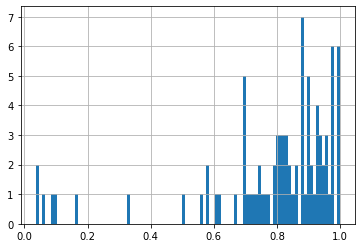

In [13]:
accuracy_hist = normilize_acc_values['quantity.normalizedQuantity'].hist(bins=100)
plt.show(accuracy_hist)